# Exploratory Data Analysis (EDA)

I cleaned my dataset and now I ready to EDA. I try to found some correlation between features and answers for questions:
1. Should we pay more for older or for modern houses?
2. What features are most important in predicting the price of a house: condition or grade?
3. How the size of a home affect its sale price?

In [34]:
# import all libraries for work 
import os # for work with path/dir
import pandas as pd

# visualizations
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns 
from scipy.stats import norm

# useful libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFE
import math

In [206]:
# quartile function. We divide the data into four quantiles and check the dependencies
def quantile(df, column_name):
# find quartile, max and min values
    min_value = df[column_name].min()
    first_quantile = df[column_name].describe()[4]
    second_quantile = df[column_name].describe()[5]
    third_quantile = df[column_name].describe()[6]
    max_value = df[column_name].max()
# Bin edges that will be used to "cut" the data into groups
    bin_edges = [ min_value, first_quantile, second_quantile, third_quantile, max_value]
# Labels for the four budget level groups
    bin_names = [ 'First', 'Second', 'Third', 'Fourth'] 
# Creates budget_levels column
    name = '{}_levels'.format(column_name)
    df[name] = pd.cut(df[column_name], bin_edges, labels=bin_names, include_lowest = True)
    return df

# quartile count function. We divide the data into four quantiles and check the dependencies
def quantile_count(df, column_name):
    count = pd.DataFrame(columns=[column_name,'count'])
    count.loc[0]=(str(df[column_name].min())+'-'+str(df[column_name].describe()[4]),df[df[column_name+'_levels']=='First']['price'].count())
    count.loc[1]=(str(str(df[column_name].describe()[4])+'-'+str(df[column_name].describe()[5])),df[df[column_name+'_levels']=='Second']['price'].count())
    count.loc[2]=(str(df[column_name].describe()[5])+'-'+str(df[column_name].describe()[6]),df[df[column_name+'_levels']=='Third']['price'].count())
    count.loc[3]=(str(df[column_name].describe()[6])+'-'+str(df[column_name].max()),df[df[column_name+'_levels']=='Fourth']['price'].count())
    return count

In [288]:
# read information from csv file
pd.set_option('display.max_columns', 999)
df = pd.read_csv("clean_kc_house_data.csv") 
df.shape

(16733, 22)

In [289]:
df.head(2)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,day
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10,0
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12,1


In [290]:
df.corr()['price'].sort_values(ascending=False)

price            1.000000
grade            0.598810
sqft_living      0.584675
sqft_living15    0.501147
sqft_above       0.475194
lat              0.435306
bathrooms        0.412425
view             0.287009
bedrooms         0.269680
floors           0.264383
sqft_basement    0.247555
yr_renovated     0.121934
waterfront       0.082390
condition        0.071273
year             0.008967
long             0.003882
zipcode         -0.000568
day             -0.010276
month           -0.014282
sqft_lot        -0.020216
sqft_lot15      -0.021415
yr_built        -0.022023
Name: price, dtype: float64

The following correlation matrix shows the correlation between any two features of the data set.

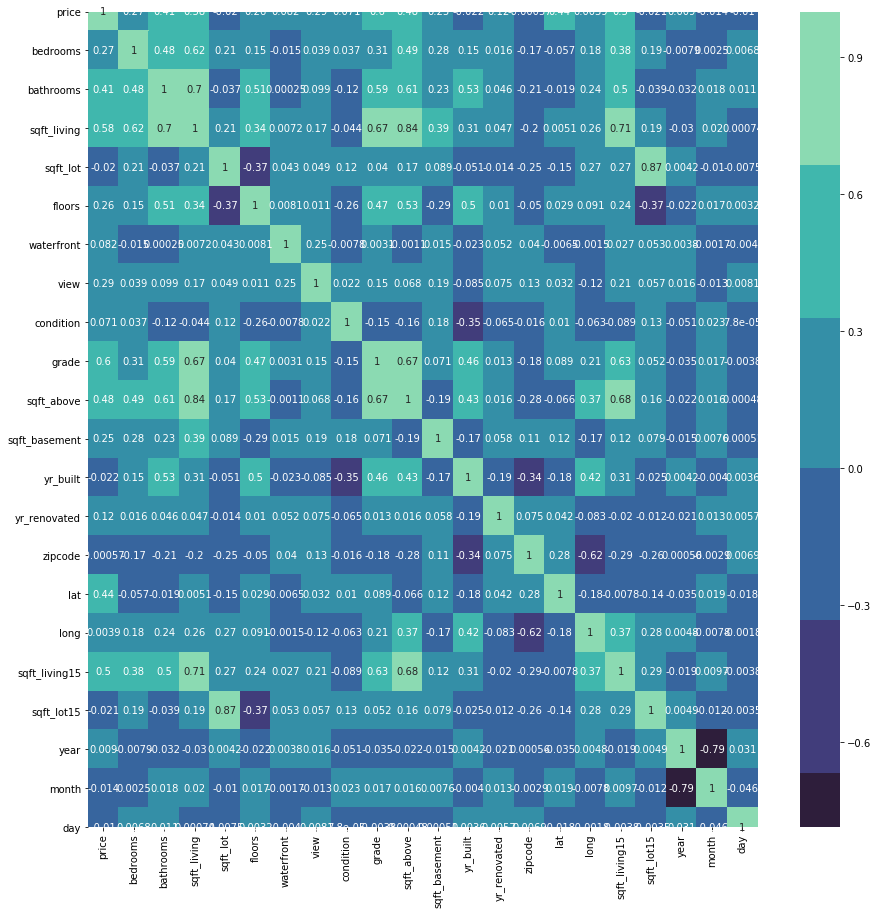

In [291]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), annot=True, cmap=sns.color_palette('mako'), center=0);

## Looking for Multicollinearity

In [268]:
round(df.corr(), 3)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,day
price,1.000,0.270,0.412,0.585,-0.020,0.264,0.082,0.287,0.071,0.599,0.475,0.248,-0.022,0.122,-0.001,0.435,0.004,0.501,-0.021,0.009,-0.014,-0.010
bedrooms,0.270,1.000,0.485,0.617,0.206,0.145,-0.015,0.039,0.037,0.313,0.489,0.283,0.149,0.016,-0.171,-0.057,0.180,0.381,0.191,-0.008,0.002,0.007
bathrooms,0.412,0.485,1.000,0.700,-0.037,0.510,0.000,0.099,-0.117,0.594,0.610,0.226,0.527,0.046,-0.208,-0.019,0.243,0.497,-0.039,-0.032,0.018,0.011
sqft_living,0.585,0.617,0.700,1.000,0.207,0.336,0.007,0.168,-0.044,0.670,0.835,0.386,0.310,0.047,-0.199,0.005,0.256,0.709,0.194,-0.030,0.020,0.001
sqft_lot,-0.020,0.206,-0.037,0.207,1.000,-0.370,0.043,0.049,0.124,0.040,0.167,0.089,-0.051,-0.014,-0.251,-0.148,0.274,0.267,0.873,0.004,-0.010,-0.008
floors,0.264,0.145,0.510,0.336,-0.370,1.000,0.008,0.011,-0.263,0.469,0.528,-0.287,0.497,0.010,-0.050,0.029,0.091,0.238,-0.371,-0.022,0.017,0.003
waterfront,0.082,-0.015,0.000,0.007,0.043,0.008,1.000,0.249,-0.008,0.003,-0.001,0.015,-0.023,0.052,0.040,-0.007,-0.001,0.027,0.053,0.004,-0.002,-0.004
view,0.287,0.039,0.099,0.168,0.049,0.011,0.249,1.000,0.022,0.152,0.068,0.186,-0.085,0.075,0.130,0.032,-0.121,0.206,0.057,0.016,-0.013,0.008
condition,0.071,0.037,-0.117,-0.044,0.124,-0.263,-0.008,0.022,1.000,-0.153,-0.155,0.182,-0.348,-0.065,-0.016,0.010,-0.063,-0.089,0.131,-0.051,0.023,0.000
grade,0.599,0.313,0.594,0.670,0.040,0.469,0.003,0.152,-0.153,1.000,0.672,0.071,0.464,0.013,-0.184,0.089,0.212,0.625,0.052,-0.035,0.017,-0.004


If we see coefficient more than *0.75* that mean two variables being 'highly correlated'.

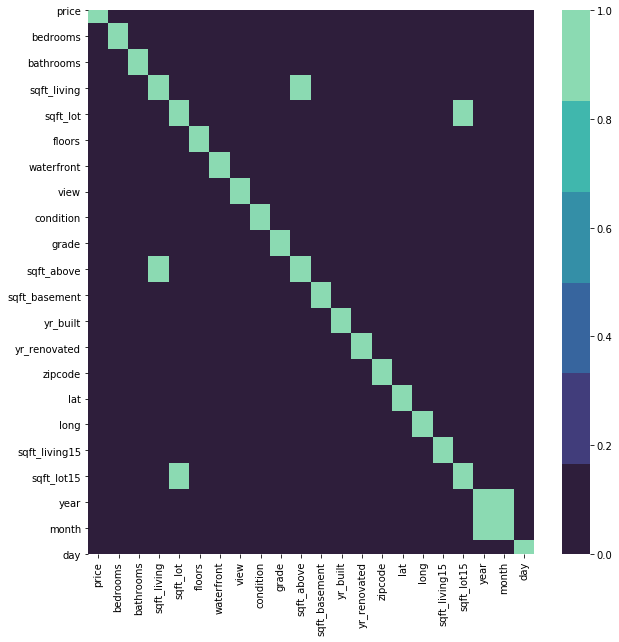

In [292]:
plt.figure(figsize=(10,10))
sns.heatmap(abs(df.corr()) > 0.75, cmap=sns.color_palette('mako'))

I decided to drop columns `month` and `sqft_lot15`.

In [293]:
df.drop('month', axis=1, inplace=True)
df.drop('sqft_lot15', axis=1, inplace=True)

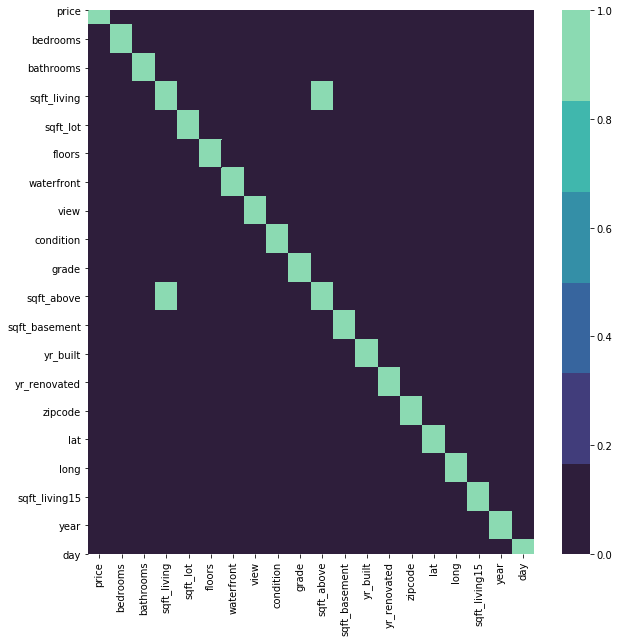

In [277]:
plt.figure(figsize=(10,10))
sns.heatmap(abs(df.corr()) > 0.75, cmap=sns.color_palette('mako'))

So, now I have only two highly correlated `'sqft_above'` and `'sqft_living'`. But `'sqft_above'` shows squre footage of house apart from basement. When `'sqft_living'` shows squre footage of all house, that can be more useful for predictions.

In [294]:
df.drop('sqft_above', axis=1, inplace=True)

# Questions 

## 1. Do we pay more for older or for modern houses?

In [279]:
#Basic stats for the yr_built feature.
df['yr_built'].describe()

count    16733.000000
mean      1968.267376
std         30.020164
min       1900.000000
25%       1948.000000
50%       1968.000000
75%       1994.000000
max       2015.000000
Name: yr_built, dtype: float64

Information in column `yr_build` range from 1900 to 2015 with a median of 1968. I thought that newer homes should be more expensive. But heatmap show me that isn't true. Negative number in heatmap means  - there are no correlationthe between two variables. But may be year of renovation show me better result.

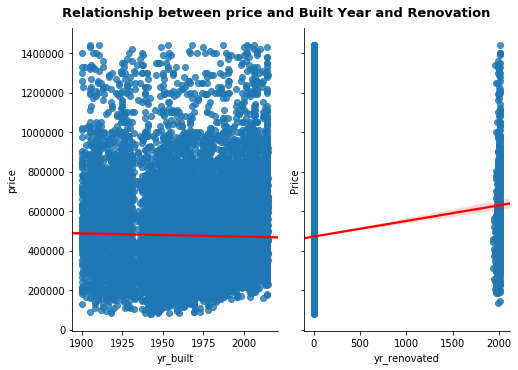

In [280]:
sns.pairplot(df, x_vars=['yr_built','yr_renovated'], y_vars='price', kind='reg', plot_kws={'line_kws':{'color':'red'}}, height=5, aspect=0.7)
plt.suptitle('Relationship between price and Built Year and Renovation', size=13, weight='bold', y=1.02)
plt.ylabel('Price');
plt.show()

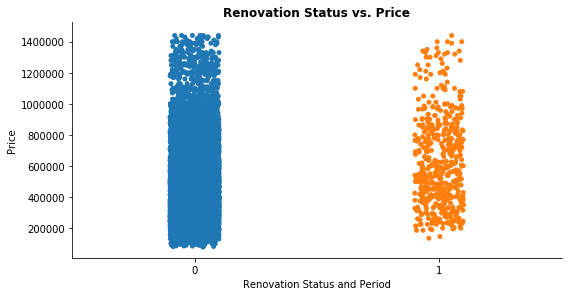

In [281]:
#make new feature - renovated: 1 == home has been renovated, 0 == we don't have any construction work
df['renovated'] = (df['yr_renovated']>0).astype(int)
# do we hava any differents?
sns.catplot(x="renovated", y="price", data=df, height=4, aspect=2)
plt.title('Renovation Status vs. Price', fontweight='bold')
plt.xlabel('Renovation Status and Period')
plt.ylabel('Price');

In [143]:
# median for each just to see what it is.
print('Median prices for', df.groupby('renovated')['price'].median())

Median prices for renovated
0    425000.0
1    577250.0
Name: price, dtype: float64


In [282]:
#Correlations with price
correlations = df.corr()
correlations['price']['renovated']

0.12152868899247996

In [145]:
from statsmodels.formula.api import ols
#OLS Regression
f = 'price~renovated'
model = ols(formula=f, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     250.8
Date:                Thu, 05 Mar 2020   Prob (F-statistic):           4.42e-56
Time:                        01:16:52   Log-Likelihood:            -2.2981e+05
No. Observations:               16733   AIC:                         4.596e+05
Df Residuals:                   16731   BIC:                         4.596e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.708e+05   1752.103    268.728      0.000    4.67e+05    4.74e+05
renovated   1.574e+05   9939.049     15.837      0.000    1.38e+05    1.77e+05
==============================================================================
Omnibus:                     3200.212   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6060.392
Skew:                           1.182   Prob(JB):                         0.00
Kurtosis:                       4.761   Cond. No.                         5.77
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [146]:
model.params

Intercept    470838.404120
renovated    157403.942034
dtype: float64

In [327]:
# To answer this question, it's best to build a new variable (feature engineering) ...
df['yr_built_cat'] = df['yr_built'].apply(lambda x: ('1900-1938' if x <= 1938 else '1939-1976') if x <= 1977 else '1977-2015')

# ... and turn it into a category
df['yr_built_cat'] = pd.Categorical(df['yr_built_cat'], categories = ['1900-1938', '1939-1976', '1977-2015'])
df.head(2)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,year,day,yr_built_cat
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,0,1955,0,98178,47.5112,-122.257,1340,2014,0,1939-1976
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,400,1951,1991,98125,47.7210,-122.319,1690,2014,1,1939-1976


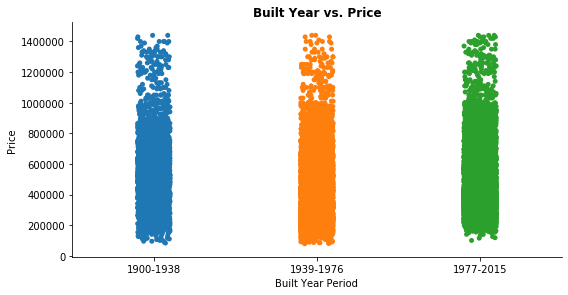

In [331]:
sns.catplot(x="yr_built_cat", y="price", data=df, height=4, aspect=2)
plt.title('Built Year vs. Price', fontweight='bold')
plt.xlabel('Built Year Period')
plt.ylabel('Price');

### Summary for question 1:
The **p-value** is zero that's good. This means that the feature is statistically significant. The coefficient of **157,404** would indicate that a renovated home has a price **157,404** more than a home that wasn't renovated.

## 2. What features are most important in predicting the price of a house: condition or grade?

In [174]:
df['grade'].value_counts()

7     7803
8     4817
6     1763
9     1694
10     426
5      179
11      35
4       16
Name: grade, dtype: int64

In [175]:
df['condition'].value_counts()

3    10712
4     4500
5     1377
2      123
1       21
Name: condition, dtype: int64

In [154]:
print('Correlation betwee price and grade ==', correlations['price']['grade'])
print('Correlation betwee price and condition ==', correlations['price']['condition'])

Correlation betwee price and grade == 0.5988102738287475
Correlation betwee price and condition == 0.07127329486045805


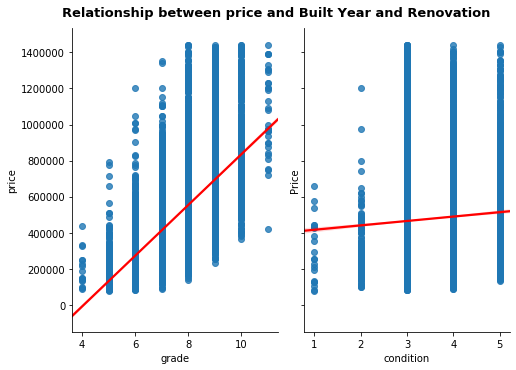

In [237]:
sns.pairplot(df, x_vars=['grade','condition'], y_vars='price', kind='reg', plot_kws={'line_kws':{'color':'red'}}, height=5, aspect=0.7)
plt.suptitle('Relationship between price and Built Year and Renovation', size=13, weight='bold', y=1.02)
plt.ylabel('Price');
plt.show()

This coefficient show us strong correlation between grade and price. What we can say about condition - it's still has.

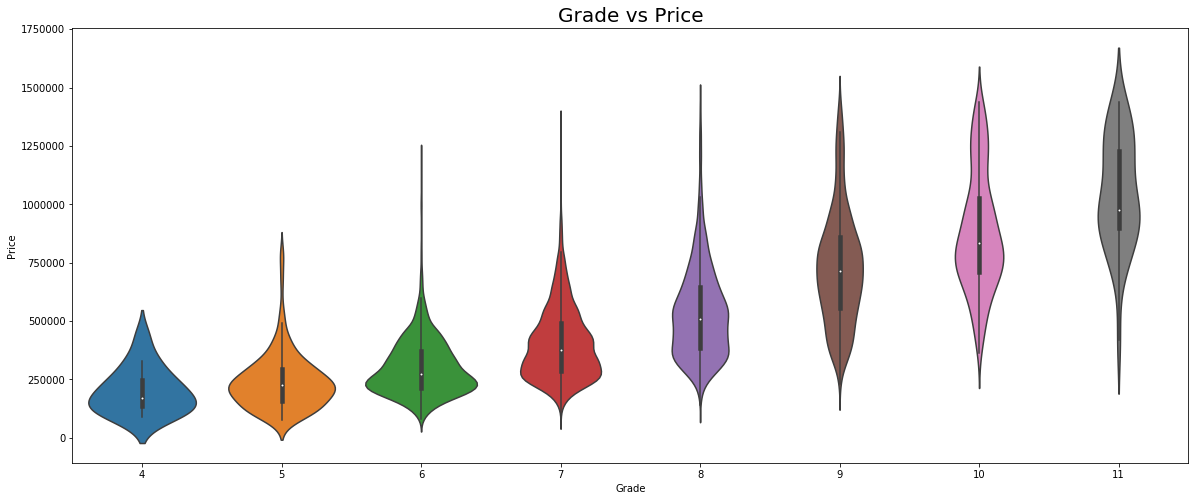

In [177]:
plt.figure(figsize=(20,8))
sns.violinplot(x='grade', y='price', data=df)
plt.title("Grade vs Price", fontsize=20)
plt.xlabel("Grade")
plt.ylabel("Price")
plt.show()

Text(0, 0.5, 'Mean Sale Price')

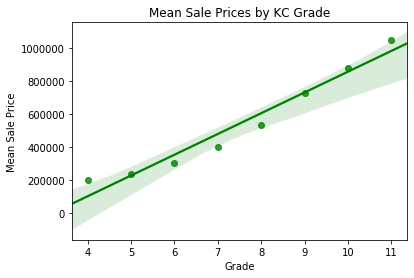

In [236]:
x_range = list(range(4,12))
mean_by_grade = df.groupby('grade').mean()['price']
mean_by_con = df.groupby('condition').mean()['price']


sns.regplot(x = x_range, y = mean_by_grade, color = 'green').set_title('Mean Sale Prices by Grade')
plt.xlabel('Grade')
plt.ylabel('Mean Sale Price')

Text(0, 0.5, 'Mean Sale Price')

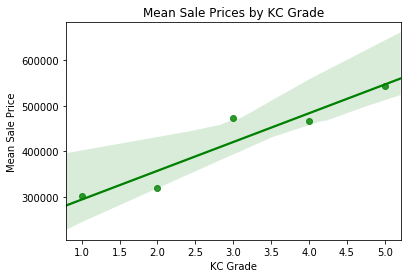

In [229]:
x_range1 = list(range(1,6))
sns.regplot(x = x_range1, y = mean_by_con, color = 'green').set_title('Mean Sale Prices by KC Grade')
plt.xlabel('KC Grade')
plt.ylabel('Mean Sale Price')

**How we can see each grade his own affect on the price.**

In [186]:
grades_subset = pd.get_dummies(df.grade, prefix='grade').iloc[:,1:]
grades_subset.head(5)


,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11
0,0,0,1,0,0,0,0
1,0,0,1,0,0,0,0
2,0,1,0,0,0,0,0
3,0,0,1,0,0,0,0
4,0,0,0,1,0,0,0


In [190]:
# concatenate the subset of variable columns onto the original dataframe
data = pd.concat([df, grade_dummies], axis=1)
data.head(5)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,0,0,1,0,0,0,0
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,0,0,1,0,0,0,0
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,0,1,0,0,0,0,0
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,0,0,1,0,0,0,0
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,0,0,0,1,0,0,0


In [200]:
X = data[['grade_5', 'grade_6', 'grade_7', 'grade_8', 'grade_9', 'grade_10', 'grade_11']]
y = data.price

# fit the model
model = LinearRegression()
model.fit(X, y)


# print intercept
print("Estimated intercept:", model.intercept_)
# print R-square
print("Estimated R²:", model.score(X,y))
#
model.get_params()
#print("Estimated :", model.  )


Estimated intercept: 201378.12500000483
Estimated R²: 0.3698555440628549


{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}

In [185]:
# pair the feature names with the coefficients into a dataframe
pd.DataFrame(list(zip(['grade_5', 'grade_6', 'grade_7', 'grade_8', 'grade_9', 'grade_10','grade_11' ], lm.coef_)), columns=['Features', 'Estimated Coefficient'])

,Features,Estimated Coefficient
0,grade_5,39729.154330
1,grade_6,101036.851177
2,grade_7,201922.067875
3,grade_8,335836.333584
4,grade_9,527681.772285
5,grade_10,677492.961854
6,grade_11,847513.560714


In [207]:
data.corr()['price'].sort_values(ascending=False)

price            1.000000
grade            0.598810
sqft_living      0.584675
sqft_living15    0.501147
sqft_above       0.475194
lat              0.435306
bathrooms        0.412425
grade_9          0.378301
grade_10         0.289920
view             0.287009
bedrooms         0.269680
floors           0.264383
sqft_basement    0.247555
grade_8          0.173937
yr_renovated     0.121934
grade_11         0.116757
waterfront       0.082390
condition        0.071273
long             0.003882
zipcode         -0.000568
sqft_lot        -0.020216
sqft_lot15      -0.021415
yr_built        -0.022023
grade_5         -0.108555
grade_6         -0.264640
grade_7         -0.301249
Name: price, dtype: float64

In [197]:
# fit the model
#model = sm.OLS(y, X).fit()
#predictions = model.predict(X)

# Print out the statistics
#model.summary()

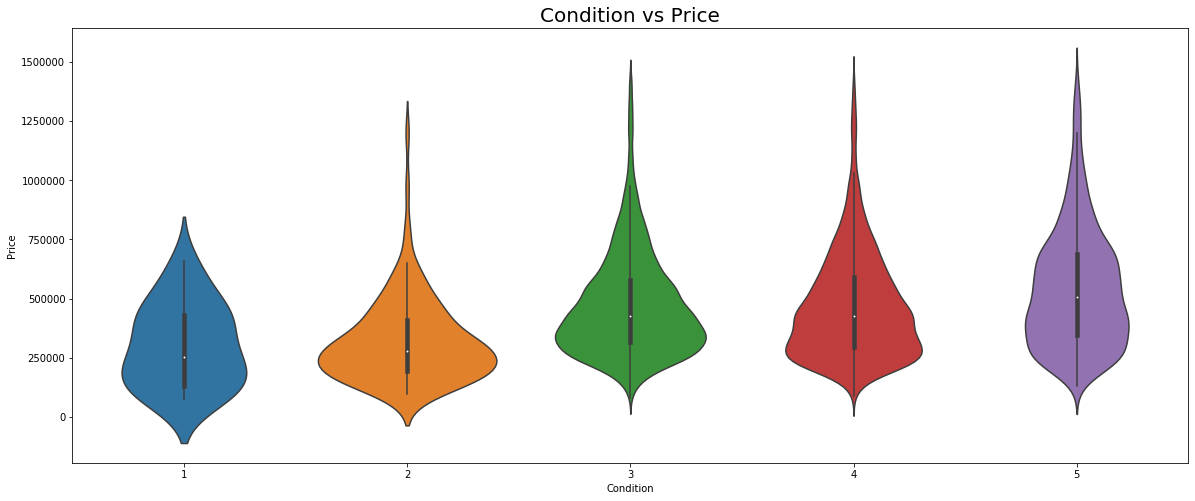

In [202]:
plt.figure(figsize=(20,8))
sns.violinplot(x='condition', y='price', data=df)
plt.title('Condition vs Price', fontsize=20)
plt.xlabel("Condition")
plt.ylabel("Price")
plt.show()

## Summary for question 2:

I found a strong correlation between grade and home price:  the higher the grade your home receives the more prices your home will sell for. 
It's makes sense because grade represents the construction quality of improvements. If  home has higher quality then we are going to sell itfor a higher value.
**This feature should go into the final model.**
But I didn't find the same correlation for conditions. I expected a more pronounced dependence, maybe we need to do any more manipulation with data.

## 3. How the size of a home affect its sale price?

How we can see in coorelation matrix - sqft_living has **0.584675**

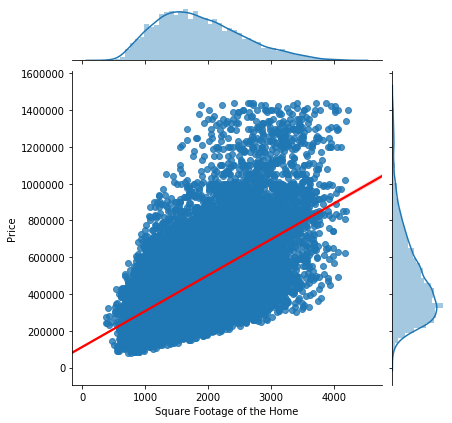

In [307]:
g = sns.jointplot(x="sqft_living", y="price", data=df, kind='reg',
                  joint_kws={'line_kws':{'color':'red'}})# Only regression cyan
#plt.title('Prices vs. Square Feet', fontsize=20)
plt.xlabel('Square Footage of the Home')
plt.ylabel('Price')
plt.show()

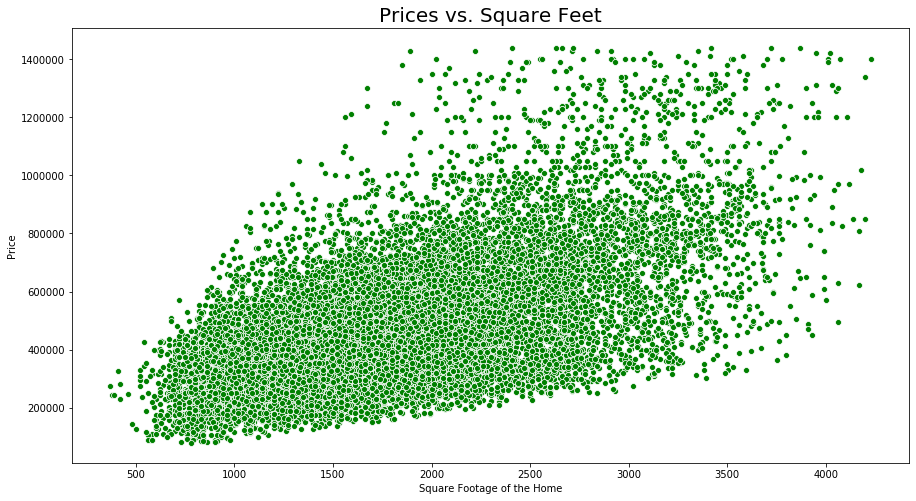

In [242]:
# Visualizing home prices
plt.figure(figsize = (15, 8))
fig = sns.scatterplot(x = 'sqft_living', y ='price' , data = df, color = 'green')
plt.title('Prices vs. Square Feet', fontsize=20)
plt.xlabel('Square Footage of the Home')
plt.ylabel('Price')
plt.show()

Text(0.5, 1.0, 'Square Footage of the Home Distribution')

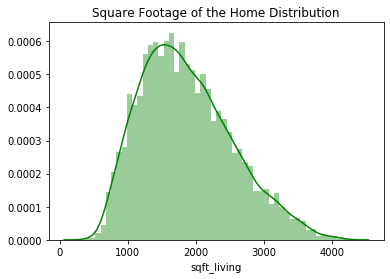

In [244]:
sns.distplot(df['sqft_living'], color='green').set_title('Square Footage of the Home Distribution')

In [257]:
p = quantile(data,'sqft_living')
c = quantile_count(p,'sqft_living')
c

,sqft_living,count
0,370-1350.0,4205
1,1350.0-1780.0,4206
2,1780.0-2300.0,4175
3,2300.0-4230,4147


We see a slight skew in this data, but distributions can tell us something about home price.

In [283]:
f = 'price~sqft_living'

model = smf.ols(formula=f, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.342
Model:                            OLS   Adj. R-squared:                  0.342
Method:                 Least Squares   F-statistic:                     8690.
Date:                Thu, 05 Mar 2020   Prob (F-statistic):               0.00
Time:                        04:36:20   Log-Likelihood:            -2.2644e+05
No. Observations:               16733   AIC:                         4.529e+05
Df Residuals:                   16731   BIC:                         4.529e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    1.121e+05   4147.630     27.028      0.000    1.04e+05     1.2e+05
sqft_living   195.0136      2.092     93.220      0.000     190.913     199.114
==============================================================================
Omnibus:                     2053.288   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3422.695
Skew:                           0.847   Prob(JB):                         0.00
Kurtosis:                       4.429   Cond. No.                     5.83e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.83e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

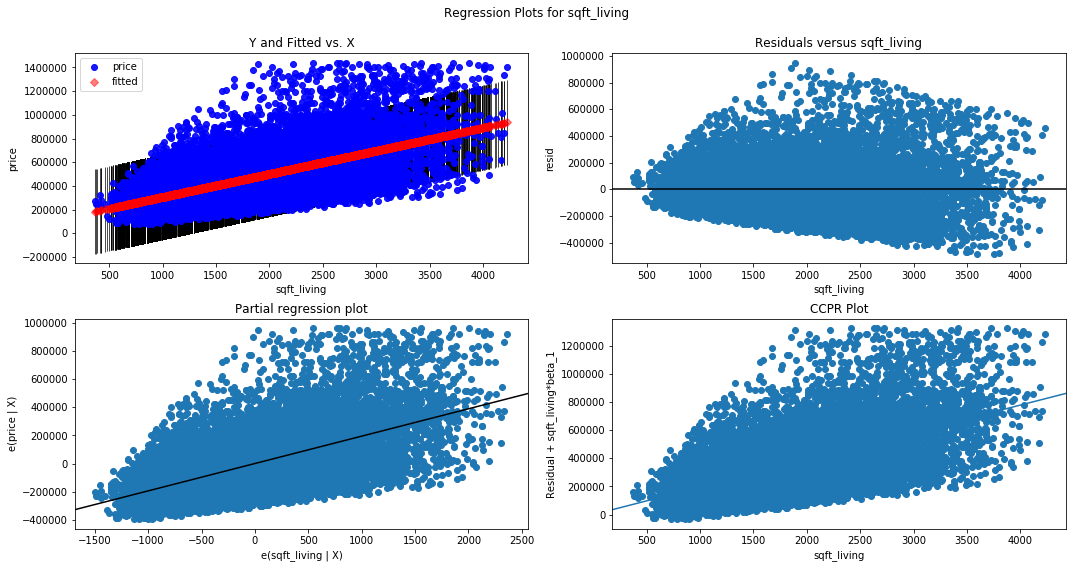

In [284]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "sqft_living", fig=fig)
plt.show()

/Users/marigaldina/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.



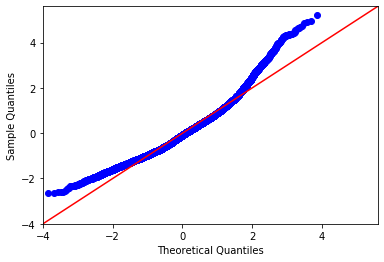

In [247]:
residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show()

Huge condition number and correlation matrix show us strong multicollinearity for `'sqft_living'` or other numerical problems.

In [296]:
# Save cleaned file to use with other pages
df.to_csv('explore_kc_house_data.csv', index=False)

# Summary

In addition to the correlations between price and other features, there are some other noteworthy facts about the correlation matrix: the strongest correlation is between sqft_living and sqft_above, the srongest negative correlation is between zipcode and longitode, suggesting that zipcodes in King County were drawn from east to west. Generally, there is a strong correlation between the quantities that relate to the size of the house: sqft_living, sqft_living15, sqft_above, bedrooms, and bathrooms.

In [286]:

# Linear Regression
lr = LinearRegression()

# Evaluate model with cross-validation
cvs = cross_val_score(estimator=lr, X=X_train, 
                                    y=y_train, 
                                    cv=10, scoring='r2')
print('CV score: %.3f ± %.3f' % (cvs.mean(), cvs.std()))

CV score: 0.706 ± 0.007


In [287]:
lr.fit(X_train, y_train)
coef_list = list(lr.coef_)
name_list = list(X_train.columns)
pd.Series(coef_list, index=name_list)

bedrooms         -13020.064711
bathrooms         28276.663182
sqft_living          60.180015
sqft_lot              0.015661
floors            28708.833079
waterfront       212292.330250
view              39352.380595
condition         27874.491753
grade             84335.836287
sqft_above           30.380300
sqft_basement        29.799714
yr_built          -2098.825753
yr_renovated         17.295057
zipcode            -276.796004
lat              565175.822411
long             -69475.006891
sqft_living15        47.616641
sqft_lot15           -1.124496
date_day           -239.662378
date_month          364.376473
date_year         25336.476466
date_DoW           -146.170793
dtype: float64

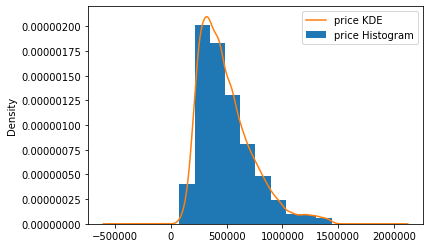

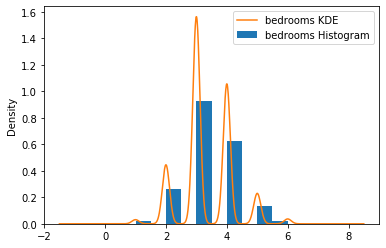

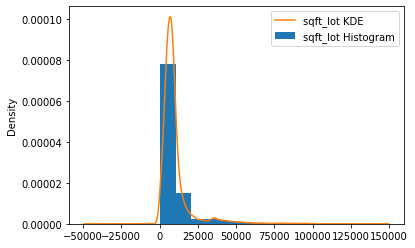

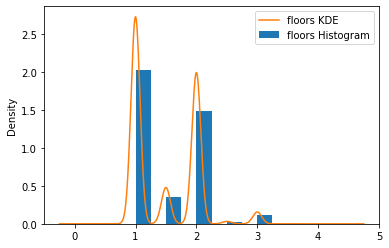

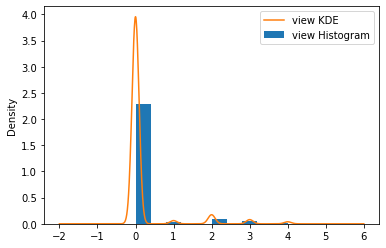

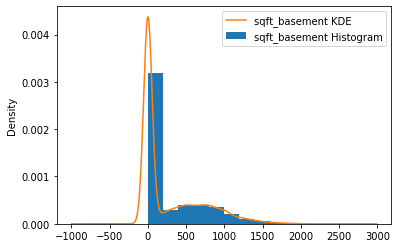

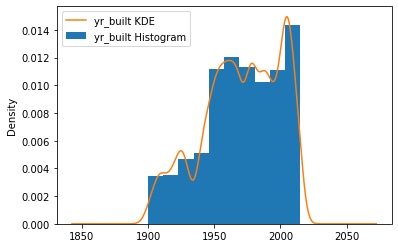

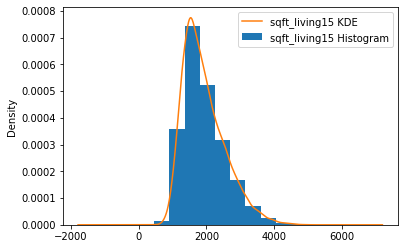

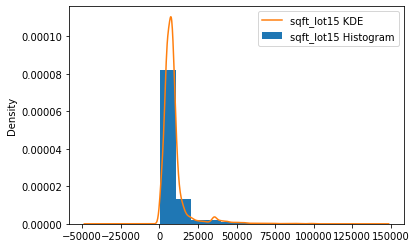

In [18]:
for column in ['price', 'bedrooms', 'sqft_lot', 'floors', 'view', 'sqft_basement', 'yr_built', 
               'sqft_living15', 'sqft_lot15']:
    df[column].plot.hist(density=True, label=column + ' Histogram')
    df[column].plot.kde(label=column + ' KDE')
    plt.legend()
    plt.show()

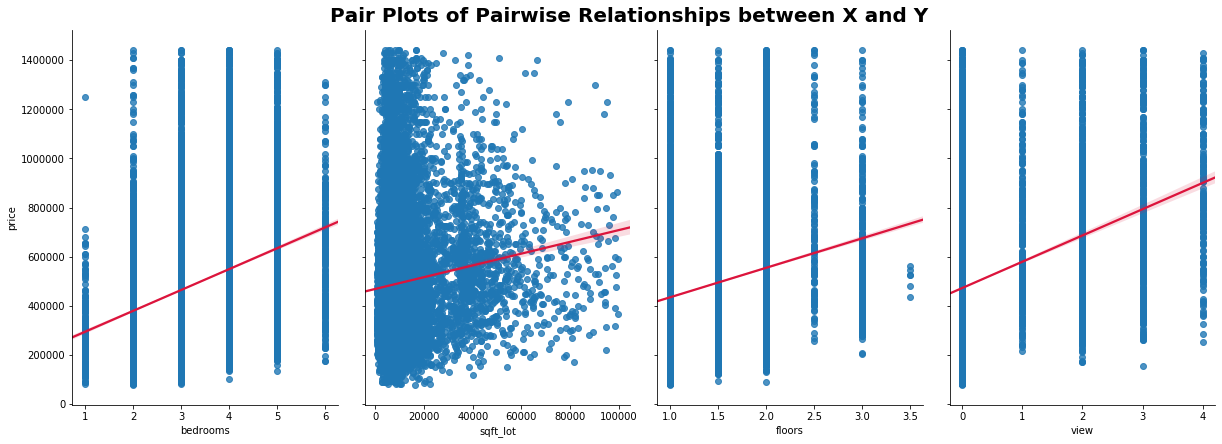

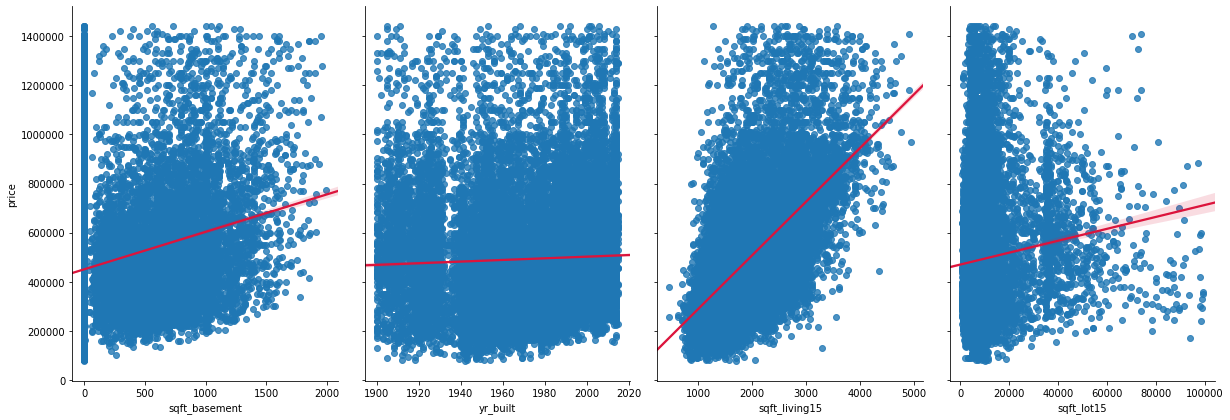

In [19]:
# visualize the pairwise relationship between the features and the response using pairplots (seaborn scatterplots)

sns.pairplot(x_vars=['bedrooms', 'sqft_lot', 'floors', 'view'], 
             y_vars='price', data=df, 
             kind='reg', plot_kws={'line_kws':{'color':'crimson'}}, height=6, aspect=0.7)

plt.suptitle('Pair Plots of Pairwise Relationships between X and Y', size=20, weight='bold', y=1.02)

sns.pairplot(x_vars=['sqft_basement', 'yr_built', 'sqft_living15', 'sqft_lot15'], 
             y_vars='price', data=df, 
             kind='reg', plot_kws={'line_kws':{'color':'crimson'}}, height=6, aspect=0.7)
plt.show();

In [25]:
# cast all categorical data with a string-datatype into categorical-datatype

df.waterfront = df.waterfront.astype('category')
df.condition = df.condition.astype('category')
df.grade = df.grade.astype('category')

In [26]:
# create dummy variables using get_dummies, then exclude one column
# (In general, if you have a categorical feature with k levels, you create k-1 dummy variables.)

waterfront_dummies = pd.get_dummies(df.waterfront, prefix='waterfront').iloc[:,0:-1]
condition_dummies = pd.get_dummies(df.condition, prefix='condition').iloc[:,1:]
grade_dummies = pd.get_dummies(df.grade, prefix='grade').iloc[:,1:]
yr_ren_cat_dummies = pd.get_dummies(df.yr_ren_cat, prefix='yr_ren_cat').iloc[:,1:]
yr_built_cat_dummies = pd.get_dummies(df.yr_built_cat, prefix='yr_built_cat').iloc[:,1:]

AttributeError: 'DataFrame' object has no attribute 'yr_ren_cat'

In [21]:

# concatenate the dummy variable columns onto the original dataframe
data = pd.concat([df, waterfront_dummies, condition_dummies, grade_dummies, 
                  yr_ren_cat_dummies, yr_built_cat_dummies], axis=1)
data.head(2)

NameError: name 'waterfront_dummies' is not defined

In [20]:
# create X and y
feature_cols = ['bedrooms', 'floors', 'view', 'sqft_basement', 'sqft_living15',
                'waterfront_0.0', 'waterfront_1.0', 
                'condition_2', 'condition_3', 'condition_4', 'condition_5',
                'grade_11', 'grade_12', 'grade_13', 'grade_3', 'grade_4', 'grade_5',
                'grade_6', 'grade_7', 'grade_8', 'grade_9',
                'yr_ren_cat_before 1980', 'yr_ren_cat_1980-1989', 'yr_ren_cat_1990-1999', 'yr_ren_cat_2000-2015',
                'yr_built_cat_middle-aged', 'yr_built_cat_modern']
X = data[feature_cols]
y = data.price

# fit the model
lm = LinearRegression()
lm.fit(X, y)

# print intercept
print("Estimated intercept:", lm.intercept_)

NameError: name 'data' is not defined

In [29]:
# only continuous data 
feature_cols_cont = ['bedrooms', 'floors', 'view']#, 'sqft_basement', 'sqft_living15']
X = df[feature_cols_cont]
y = df.price
# add an intercept (beta_0) to our model
X = sm.add_constant(X) 

# fit the model
model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.229
Model:                            OLS   Adj. R-squared:                  0.229
Method:                 Least Squares   F-statistic:                     2019.
Date:                Wed, 04 Mar 2020   Prob (F-statistic):               0.00
Time:                        15:13:39   Log-Likelihood:            -2.7805e+05
No. Observations:               20341   AIC:                         5.561e+05
Df Residuals:                   20337   BIC:                         5.561e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8.651e+04   6637.677     13.034      0.000    7.35e+04    9.95e+04
bedrooms    7.101e+04   1725.071     41.163      0.000    6.76e+04    7.44e+04
floors      1.013e+05   2758.135     36.743      0.000    9.59e+04    1.07e+05
view        1.031e+05   2182.081     47.246      0.000    9.88e+04    1.07e+05
==============================================================================
Omnibus:                     2816.521   Durbin-Watson:                   0.890
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4523.410
Skew:                           0.960   Prob(JB):                         0.00
Kurtosis:                       4.285   Cond. No.                         18.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""